In [2]:
# Ejercicio 1

import pandas as pd

folder = "data/precio_casas.csv"

df = pd.read_csv(folder, sep=";")

df.head()

,Mediana ingresos,Mediana antiguedad,Num. hab. promedio,Num. dorm. promedio,Poblacion,Ocup. promedio,Latitud,Longitud,Mediana precio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mediana ingresos     20640 non-null  float64
 1   Mediana antiguedad   20640 non-null  float64
 2   Num. hab. promedio   20640 non-null  float64
 3   Num. dorm. promedio  20640 non-null  float64
 4   Poblacion            20640 non-null  float64
 5   Ocup. promedio       20640 non-null  float64
 6   Latitud              20640 non-null  float64
 7   Longitud             20640 non-null  float64
 8   Mediana precio       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Variable: Mediana ingresos
R2: 0.47344749180719903
MSE: 0.7011311502929527
RMSE: 0.8373357452616917



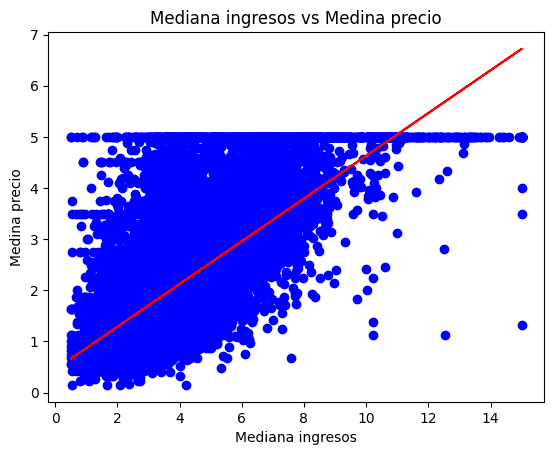

Variable: Mediana antiguedad
R2: 0.011156305266710742
MSE: 1.3166951184561146
RMSE: 1.147473362852539



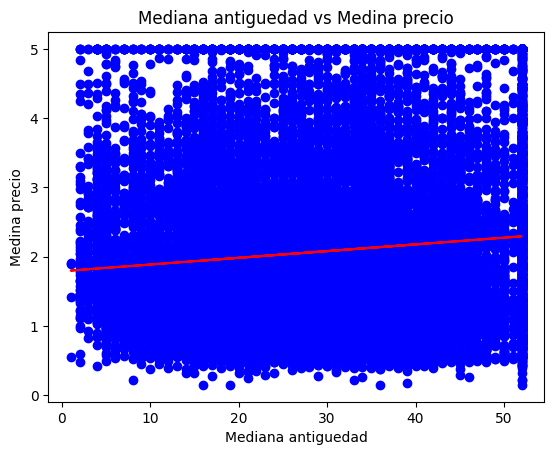

Variable: Num. hab. promedio
R2: 0.023088282755354128
MSE: 1.3008070902505422
RMSE: 1.1405293026707126



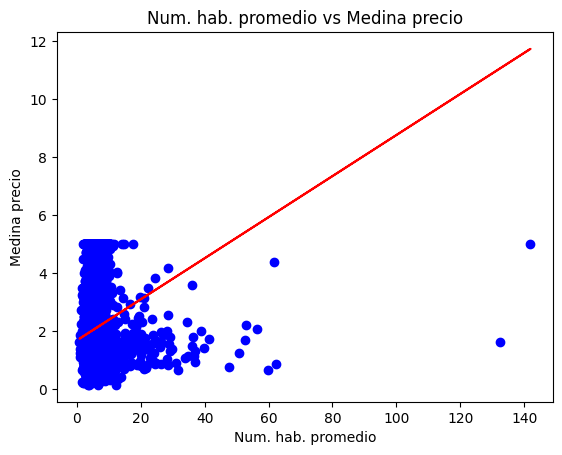

Variable: Num. dorm. promedio
R2: 0.0021809379116133343
MSE: 1.3286462715511391
RMSE: 1.1526691943272966



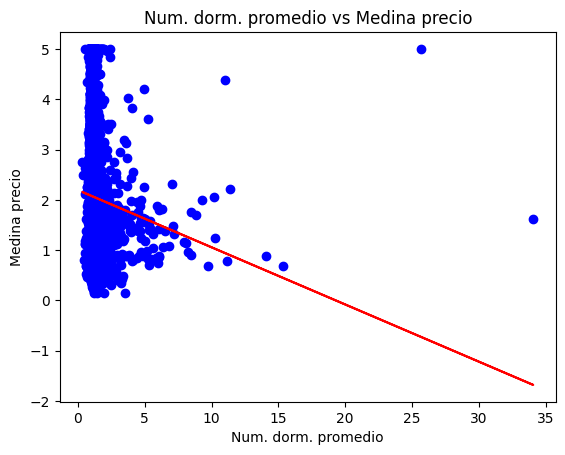

Variable: Poblacion
R2: 0.0006076066693254667
MSE: 1.3307412412389357
RMSE: 1.1535775835369442



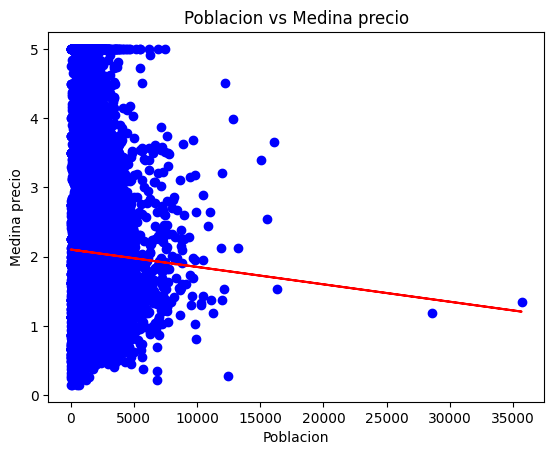

Variable: Ocup. promedio
R2: 0.0005634647738501641
MSE: 1.330800018393102
RMSE: 1.1536030592856028



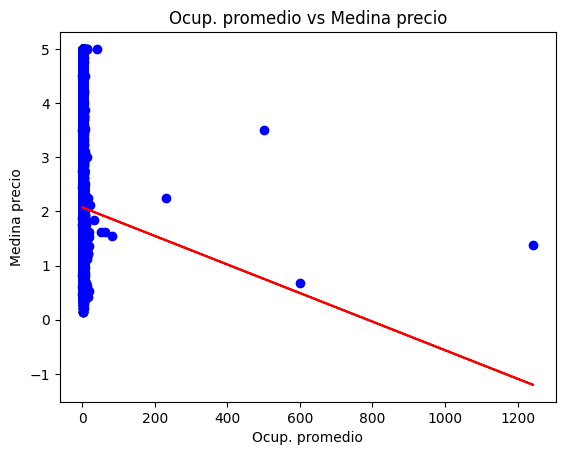

Variable: Latitud
R2: 0.020782185428578348
MSE: 1.3038777748380284
RMSE: 1.1418746756268958



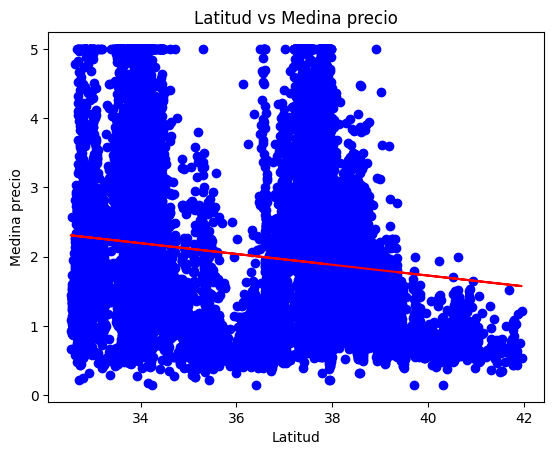

Variable: Longitud
R2: 0.0021129297054044427
MSE: 1.3287368278985245
RMSE: 1.1527084748098821



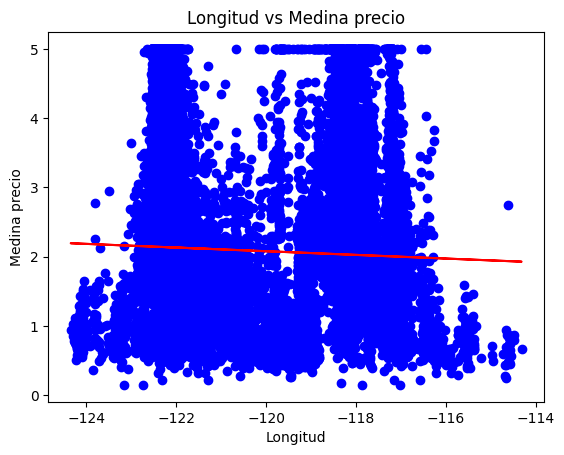

In [ ]:
# Ejercicio 2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression # Vamos a usar la regresión lineal

df_ejercicio2 = df.copy() # lo copio para no modificar el original

X = df_ejercicio2.iloc[:, :-1].values
y = df_ejercicio2.iloc[:, -1].values

columns_names = df_ejercicio2.columns
reg = LinearRegression()

# Vamos a hacer un bucle para entrenar un modelo por cada variable
for i in range(X.shape[1]):
    train_data = X[:, i].reshape(-1, 1) # Necesitamos que sea una matriz 2x2
    reg.fit(train_data, y)
    predictions = reg.predict(train_data)

    print(f"Variable: {columns_names[i]}")
    print(f"R2: {reg.score(train_data, y)}") # R2 del modelo, tambien se puede sacar la MSE o RMSE
    mse = np.mean((predictions - y) ** 2)
    print(f"MSE: {mse}")
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse}")
    print("")

    plt.scatter(X[:, i], y, color = 'blue')
    plt.plot(X[:, i], predictions, color = 'red')
    plt.title(f"{columns_names[i]} vs Medina precio")
    plt.xlabel(columns_names[i])
    plt.ylabel("Medina precio")
    plt.show()

In [10]:
# Ejercicio 3

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 123)

In [ ]:
# Ejercicio 4, aquí pone coeficiente de dispercion, que se refiere al R2, sin embargo yo prefiero llamarlo coeficiente de determinacion

columns_names = df_ejercicio2.columns
reg = LinearRegression()
score_for_columns = {} # se puede hacer con una lista tambien pero un diccionario es mas facil de leer

# Vamos a hacer un bucle para entrenar un modelo por cada variable
for i in range(X.shape[1]):
    train_data = X[:, i].reshape(-1, 1) # Necesitamos que sea una matriz 2x2
    reg.fit(train_data, y)
    r2 = reg.score(train_data, y) 
    score_for_columns[columns_names[i]] = reg.score(train_data, y)

#ordenamos el diccionario
score_for_columns = dict(sorted(score_for_columns.items(), key=lambda item: item[1], reverse=True))
print(score_for_columns)

{'Mediana ingresos': 0.47344749180719903, 'Num. hab. promedio': 0.023088282755354128, 'Latitud': 0.020782185428578348, 'Mediana antiguedad': 0.011156305266710742, 'Num. dorm. promedio': 0.0021809379116133343, 'Longitud': 0.0021129297054044427, 'Poblacion': 0.0006076066693254667, 'Ocup. promedio': 0.0005634647738501641}


In [18]:
""" Ejercicio 5: Entrenar 8 modelos de regresión lineal sin regularización. El primero solo con la
variable con mayor R2, el segundo con las dos variables con mayores R2, el tercero
con las tres variables con mayores valores de R2, y así sucesivamente. """

from sklearn.metrics import mean_squared_error
from math import sqrt

df_copy = df.copy()
reg = LinearRegression()
columns_names = list(score_for_columns.keys()) # lo pasamos a lista para poder hacer slicing, keys() por defecto te devuelve un objeto iterable no una lista de python
y = df_copy.iloc[:, -1].values
# Vamos a hacer un bucle para entrenar un modelo por cada variable
for i in range(1, len(columns_names) + 1):
    train_data = df_copy[columns_names[:i]].values
    reg.fit(train_data, y)
    predictions = reg.predict(train_data)
    mse = mean_squared_error(y, predictions)
    rmse = sqrt(mse)
    print(f"Modelo con {i} variables: {columns_names[:i]}")
    print(f"R2: {reg.score(train_data, y)}")
    print(f"RMSE: {rmse}")
    print("")


Modelo con 1 variables: ['Mediana ingresos']
R2: 0.47344749180719903
RMSE: 0.8373357452616917

Modelo con 2 variables: ['Mediana ingresos', 'Num. hab. promedio']
R2: 0.4794108744213321
RMSE: 0.8325806906141897

Modelo con 3 variables: ['Mediana ingresos', 'Num. hab. promedio', 'Latitud']
R2: 0.4857249423202674
RMSE: 0.827516227863863

Modelo con 4 variables: ['Mediana ingresos', 'Num. hab. promedio', 'Latitud', 'Mediana antiguedad']
R2: 0.5189810787396392
RMSE: 0.8003129943648678

Modelo con 5 variables: ['Mediana ingresos', 'Num. hab. promedio', 'Latitud', 'Mediana antiguedad', 'Num. dorm. promedio']
R2: 0.5407442053141482
RMSE: 0.7819988434954714

Modelo con 6 variables: ['Mediana ingresos', 'Num. hab. promedio', 'Latitud', 'Mediana antiguedad', 'Num. dorm. promedio', 'Longitud']
R2: 0.60503977859056
RMSE: 0.7251961123297043

Modelo con 7 variables: ['Mediana ingresos', 'Num. hab. promedio', 'Latitud', 'Mediana antiguedad', 'Num. dorm. promedio', 'Longitud', 'Poblacion']
R2: 0.605080

## Ejercicio extra: Probar a normalizar el conjunto de datos y repetir los ejercicios con el conjunto de datos normalizado